## Import

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow_hub as tf_hub
import os
%matplotlib inline
style_transfer_TFHub_URL = 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'

In [2]:
print(f'tf version: {tf.__version__}')

tf version: 2.0.0


## Load and pre-process images

In [3]:
def load_preprocessing_img(path):
    '''
    preprocess the image array into a normalized 4-D tensor to feed to the model provided by TF_Hub
    '''
    dim_thresh = 512
    img = cv2.imread(path)
    img = img.astype('float32')
    img /= 255.
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    scale = dim_thresh/max(img.shape)
    scaled = (int(img.shape[1]*scale),int(img.shape[0]*scale))
    img = cv2.resize(img,scaled)
    img = tf.convert_to_tensor(img)
    img = img[tf.newaxis,:]
    return img

In [4]:
content = load_preprocessing_img('sean.jpg')
style = load_preprocessing_img('styles/the-scream-by-edvard-munch.jpg')

In [5]:
print('content size: {}'.format(content.shape))
print('style size: {}'.format(style.shape))

content size: (1, 512, 380, 3)
style size: (1, 512, 401, 3)


## testing - style transfer to mona lisa

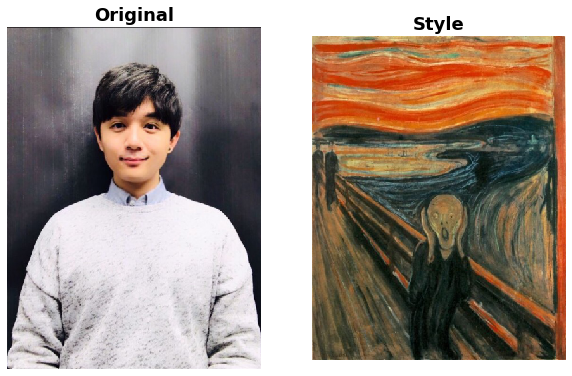

In [6]:
fig,axes = plt.subplots(1,2,figsize=(10,10))
for ax,img,title in zip(axes,[content,style],['Original','Style']):
    ax.imshow(img[0])
    ax.axis('off')
    ax.set_title(title,fontsize=18,fontweight='bold')

In [7]:
hub_module = tf_hub.load(style_transfer_TFHub_URL)
result = hub_module(tf.constant(content),tf.constant(style))[0]

In [8]:
def tensor_to_array(tensor):
    tensor = tensor * 255
    array = tensor.numpy().astype(int)
    array = array[0]
    return array

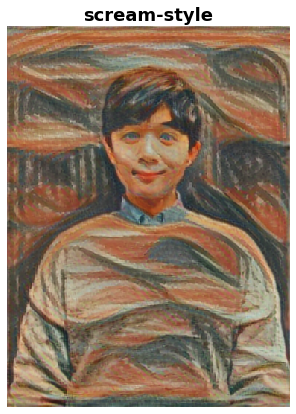

In [9]:
plt.figure(figsize=(7,7))
plt.imshow(tensor_to_array(result))
plt.title('scream-style',fontsize=18,fontweight='bold')
plt.axis('off')
plt.show()

## testing - style transfer

In [10]:
file_list = ['LesDemoisellesdAvignon-by-pablo-picasso','Goguryeo_tomb_mural','no-1-lavender-mist-by-jackson-pollock','starry-night-by-vincent-van-gogh','the-kiss-by-gustav-klimt','the-persistence-of-memory-by-salvador-dali','the-scream-by-edvard-munch','the-weeping-woman-by-pablo-picasso','water-lily-pond-by-claude-monet']
title_list = ['Avignon','TombMural','LavenderMist','StarryNight','Kiss','PersistenceOfMemory','Scream','WeepingWoman','WaterLilyPond']
style_list = [load_preprocessing_img(os.path.join('styles',file+'.jpg')) for file in file_list]

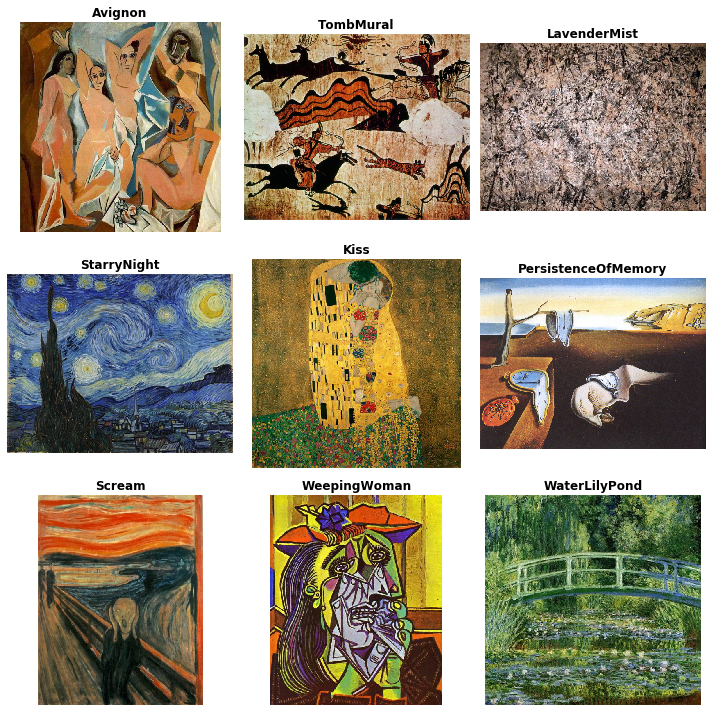

In [11]:
fig,axes = plt.subplots(3,3,figsize=(10,10))
for ax,style,title in zip(axes.flatten(),style_list,title_list):
    ax.imshow(style[0])
    ax.axis('off')
    ax.set_title(title,fontweight='bold')
plt.tight_layout()

In [12]:
result_list = [hub_module(tf.constant(content),tf.constant(style))[0] for style in style_list]

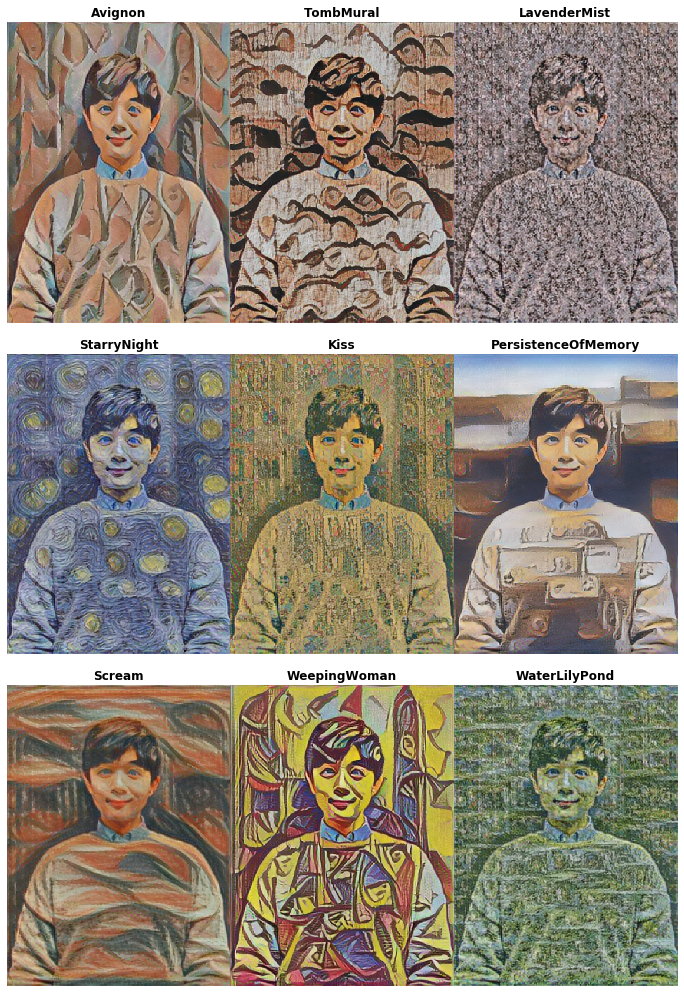

In [13]:
fig,axes = plt.subplots(3,3,figsize=(8*1.5,12*1.5))
for ax,result,title in zip(axes.flatten(),result_list,title_list):
    ax.imshow(result[0])
    ax.axis('off')
    ax.set_title(title,fontweight='bold')
fig.subplots_adjust(wspace=0,hspace=0.05)

## art <--> art style transfer

In [14]:
def plot_style_transfer(content_path,content_title,style_path,style_title):
    content = load_preprocessing_img(content_path)
    style = load_preprocessing_img(style_path)
    hub_module = tf_hub.load(style_transfer_TFHub_URL)
    result = hub_module(tf.constant(content),tf.constant(style))[0]
    title = '{} drawn with {} style'.format(content_title,style_title)
    plt.figure(figsize=(7,7))
    plt.imshow(tensor_to_array(result))
    plt.title(title,fontsize=18,fontweight='bold')
    plt.axis('off')
    plt.show()

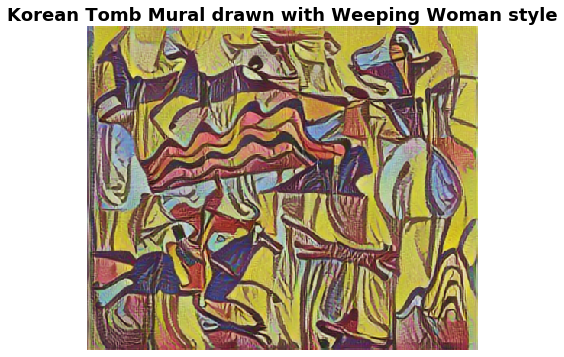

In [15]:
content_path = 'styles/Goguryeo_tomb_mural.jpg'
style_path = 'styles/the-weeping-woman-by-pablo-picasso.jpg'
plot_style_transfer(content_path,'Korean Tomb Mural',style_path,'Weeping Woman')

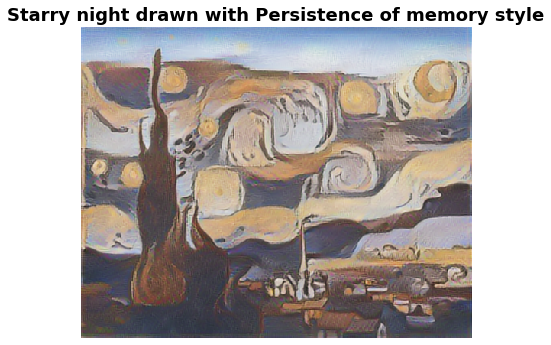

In [16]:
content_path = 'styles/starry-night-by-vincent-van-gogh.jpg'
style_path = 'styles/the-persistence-of-memory-by-salvador-dali.jpg'
plot_style_transfer(content_path,'Starry night',style_path,'Persistence of memory')